
# Linear Regression with Python Scikit Learn

What is Simple Linear Regression?

Simple linear regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable and finds a linear function that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. 





# THE SPARKS FOUNDATION


# TASK 1: Prediction Using Supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#LIBRARIES REQUIRED FOR FITTING THE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#LOAD THE DATA
data  = pd.read_csv('student_scores - student_scores.csv')

In [3]:
#PRINT THE FIRST 5 ENTRIES OF THE DATAFRAME
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#CHECK IF THERE ARE ANY MISSING VALUES IN OUR DATASET
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#THE DESCRIBE FEATURE GIVES US SOME IMPORTANT INFORMATION ABOUT OUR DATASET LIKE MEAN,COUNT,STANDARD DEVIATION ETC.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Now lets visualize the dataset in hand by plotting it using Matplotlib and Seaborn

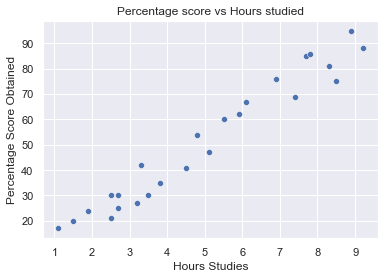

In [6]:
#VISUALIZING THE DATA 
sns.scatterplot(x = data['Hours'], y = data['Scores'])
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Score Obtained')
plt.title('Percentage score vs Hours studied')
plt.show()

# Initializing the features and attributes and preparing the data

In [7]:
#SEPARATING THE FEATURES AND TARGETS 
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [8]:
#SPLITTING OUR DATASET INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
#PRINTING THE TOTAL NUMBER OF TRAINING AND TESTING FEATURES AND SAMPLES
print('Number of training features :' , X_train.shape)
print('Number of training targets :' , y_train.shape)
print('Number of testing features:' , X_test.shape)
print('Number of testing targets:' , y_test.shape)

Number of training features : (20, 1)
Number of training targets : (20,)
Number of testing features: (5, 1)
Number of testing targets: (5,)


# Training the Algorithm

In [10]:
#FITTING THE TRAINING DATA INTO THE LINEAR REGRESSION MODEL
reg = LinearRegression()
reg.fit(X_train, y_train)
print('Fitting the training data is complete')

Fitting the training data is complete


In [11]:
#PRINTING THE WEIGHT AND BIAS i.e., COEFFICIENT AND INTERCEPT RESPECTIVELY
reg.coef_, reg.intercept_

(array([9.91065648]), 2.018160041434683)

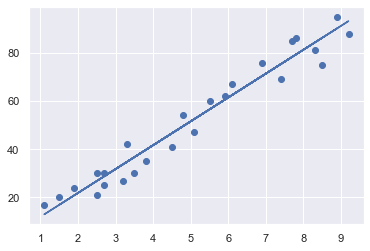

In [12]:
#PLOTTING THE REGRESSION LINE 
RegressionLine = reg.coef_*X + reg.intercept_
plt.scatter(X,y)
plt.plot(X, RegressionLine)
plt.show()

# Making Predictions

In [13]:
#PREDICTED THE TARGET VALUES OF THE TESTING SET
y_predicted = reg.predict(X_test)
y_predicted

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
#CREATING A DATAFRAME AND DISPLAYING THE ACTUAL AND THE PREDICTED VALUE OF THE TESTING DATASET
data1 = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_predicted})

In [15]:
data1

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Calculating the Accuracy of our model

In [16]:
#OBTAINING THE ACCURACY OF OUR MODEL WITH THE HELP OF THE SCORE() FUNCTION
Accuracy = reg.score(X_test, y_test)*100
print('The accuracy of our model is ', Accuracy,'%')

The accuracy of our model is  94.54906892105356 %


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
#PREDICITNG FOR AN ENTIRELY NEW VALUE OF OUR FEATURE
hours = [9.25]
final_score = reg.predict([hours])
print('The score of a student who studied 9.25 hours is ', final_score)

The score of a student who studied 9.25 hours is  [93.69173249]


# Evaluating the model by calculating the loss

In [18]:
#CALCULATING THE LOSS OCCURED IN OUR MODEL USING MEAN ABSOLUTE ERROR
print('The error in our model is:', metrics.mean_absolute_error(y_test, y_predicted)) 

The error in our model is: 4.183859899002975
